In [13]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
glass_df = pd.read_csv("glass.csv")

In [3]:
glass_df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
glass_df.describe() 

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Text(0.5, 1.0, 'Count of Glass Types')

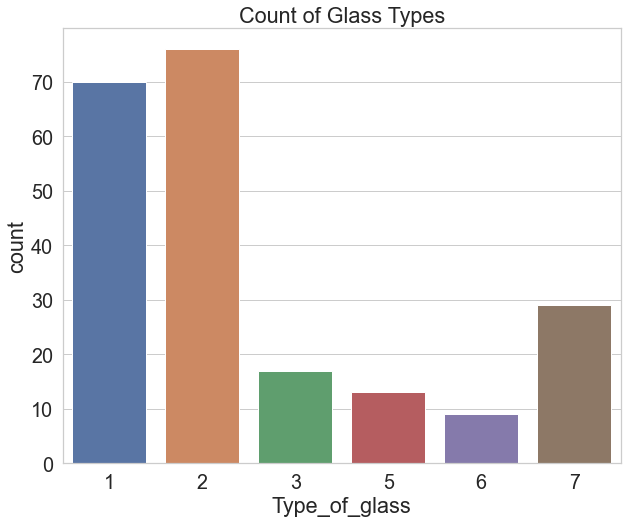

In [6]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (10,8))
sns.countplot('Type_of_glass',data=glass_df).set_title('Count of Glass Types')

In [7]:
glass_df.groupby('Type_of_glass', as_index=False).mean()

,Type_of_glass,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,35.5,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


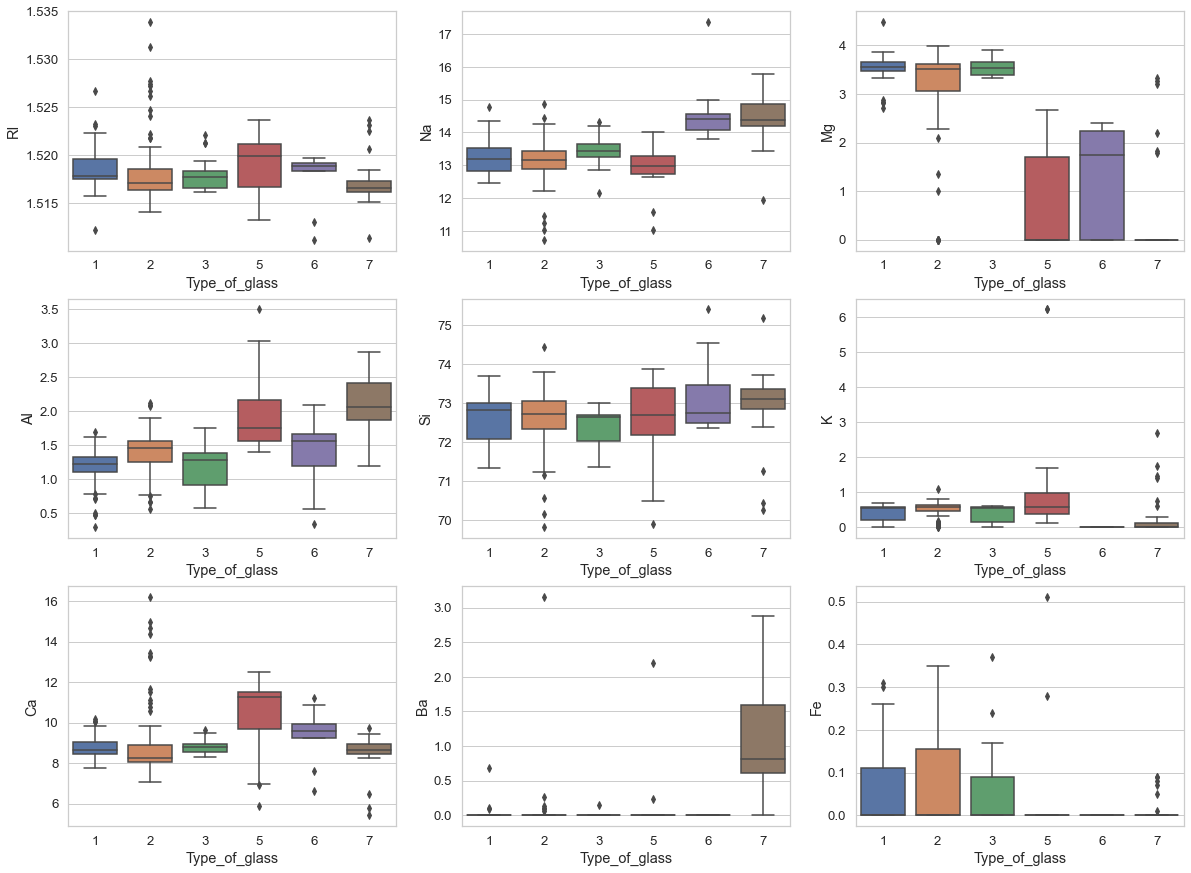

In [8]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type_of_glass', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type_of_glass', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type_of_glass', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type_of_glass', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type_of_glass', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type_of_glass', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type_of_glass', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type_of_glass', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type_of_glass', y='Fe', data=glass_df)
plt.show()

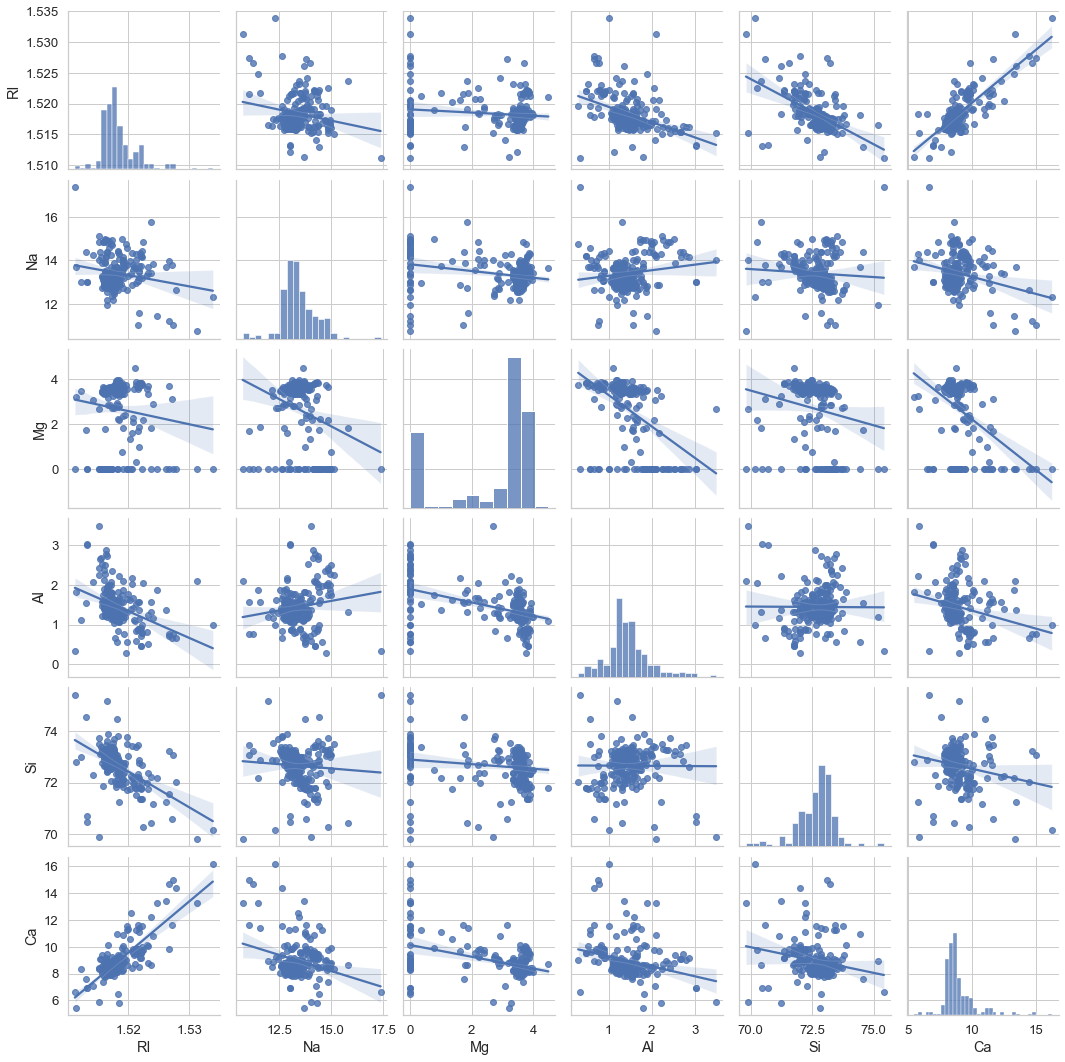

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

<AxesSubplot:>

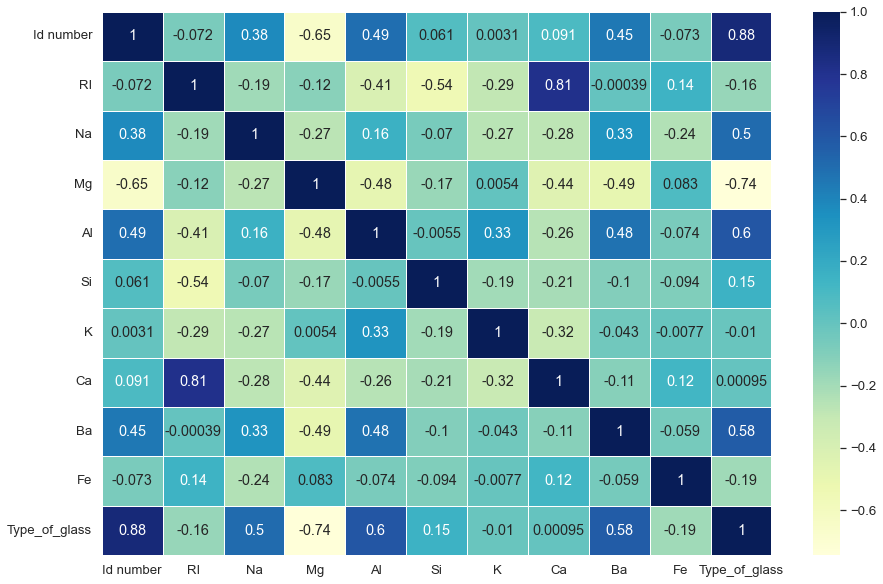

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.



In [19]:
X = glass_df.drop('Type_of_glass', axis=1)
Y = glass_df['Type_of_glass']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [21]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [22]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 95.34883720930233

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         5
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        43
   macro avg       0.78      0.82      0.80        43
weighted avg       0.94      0.95      0.94        43

Cross Validation Score: 85.86932447397564

Accuracy Score - Cross Validation Score is 9.479512735326693


In [23]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 97.67441860465115

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.98        43
   macro avg       0.99      0.99      0.99        43
weighted avg       0.98      0.98      0.98        43

Cross Validation Score: 83.98671096345515

Accuracy Score - Cross Validation Score is 13.687707641195999


In [24]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.34883720930233

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.89      1.00      0.94        16
           3       1.00      0.80      0.89         5
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        43
   macro avg       0.98      0.91      0.94        43
weighted avg       0.96      0.95      0.95        43

Cross Validation Score: 92.51384274640088

Accuracy Score - Cross Validation Score is 2.8349944629014487


In [25]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 79.06976744186046


In [27]:
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X.iloc[:,0:5],Y)

SVC(C=10, gamma=0.1)

In [28]:
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [29]:
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>